## Исследование данных о российском кинопрокате



**Цель исследования** -  изучение рынка российского кинопроката, в особенности изучение интереса зрителей к фильмам, получившим государственную поддержку.<br> 
Работа будет проводиться с данными, опубликованными на портале открытых данных Министерства культуры.<br>  Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.<br>  

**Этапы исследования:**

Шаг 1 - Знакомство с данными\
Шаг 2 - Предобработка данных\
Шаг 3 - Исследовательский анализ данных\
Шаг 4 - Исследуем фильмы, которые получили государственную поддержку\
Шаг 5 - Общий вывод

### Шаг 1. Знакомство с данными



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
# откроем первый файл
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.info()
movies.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
# откроем вторую таблицу
shows = pd.read_csv('/datasets/mkrf_shows.csv')
shows.info()
shows.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


Необходимо объединить таблицы по общему столбцу 'puNumber'. Попытки изменить тип данных могут оказаться неудачными из-за нецифровых символов. Напишем функцию, которая находит такие записи.

In [4]:
movies[~movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В строке 804 видимо есть пробелы между символами. В строке 1797 слово "нет" вместо числа.

In [5]:
# для объединения таблиц приведем общий столбец к одному типу
movies.loc[804, 'puNumber'] = movies.loc[804, 'puNumber'].strip()
movies.loc[1797, 'puNumber'] = '0'

movies['puNumber'] = pd.to_numeric(movies['puNumber'])
movies['puNumber'].dtype



dtype('int64')

In [6]:
# объединим таблицы
films = movies.merge(shows, on='puNumber', how='left')
films.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Вывод:** Для того чтобы объединить таблицы нам необходимо было привести столбец 'puNumber' к общему типу. Также видно из содержимого датафрейма и сводной информации, рейтинг и дата премьеры фильма, хранятся в неподходящем формате object.<br>



### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных



**Столбец 'show_start_date'**

In [7]:
# переведем столбец с датой в формат datetime 
films['show_start_date'] = pd.to_datetime(films['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
films['show_start_date'].head()

0   2015-11-27 12:00:00
1   2016-09-13 12:00:00
2   2016-10-10 12:00:00
3   2016-06-10 12:00:00
4   2015-07-29 12:00:00
Name: show_start_date, dtype: datetime64[ns]

**Столбец 'ratings'**

In [8]:
films['ratings'].sort_values().unique()


array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [9]:
invalid_raitings = films[films['ratings'].str.contains('[^0-9.]').fillna(False)]
invalid_raitings

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.0"
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.0"
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.0"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.7"
2126,Поездка к матери,111002015,2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.0
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,"10,000,000.0","40,000,000.0",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.0"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Часть данных хранится в формате процентов, хотя обычно для рейтингов используют десятибальную систему. Перепишем проценты в этих строках как доли от 10 баллов, а затем приведём всё к числу. Убедимся, что предельные значения находятся в диапазоне от 1 до 10 и поменяем тип на float.

In [10]:
films.loc[invalid_raitings.index, 'ratings'] = (invalid_raitings['ratings'].str[0]
                                               + '.' + invalid_raitings['ratings'].str[1])
films['ratings'] = films['ratings'].astype(float)
films['ratings'].describe()[['min', 'max']]

min   1.0
max   9.9
Name: ratings, dtype: float64

#### Шаг 2.2. Изучим пропуски в датафрейме



In [11]:
display(films.isna().sum())
# визуализируем процент пропусков
for col in films.columns:
    pct_missing = np.mean(films[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

title - 0%
puNumber - 0%
show_start_date - 0%
type - 0%
film_studio - 0%
production_country - 0%
director - 0%
producer - 8%
age_restriction - 0%
refundable_support - 96%
nonrefundable_support - 96%
budget - 96%
financing_source - 96%
ratings - 13%
genres - 13%
box_office - 58%


Пропущена значительная часть данный в refundable_support, nonrefundable_support, budget, financing_source. Эти данные говорят об объёме государственной поддержки, и скорее всего факт пропуска связан со страной выпуска (зарубежные фильмы) или отсутствием господдержки. Заменим пропуски на 0 в этих столбцах. Пропуски в столбцах указывающих бюджет и источник госфинансирования оставим без изменений

In [12]:
films['refundable_support'] = films['refundable_support'].fillna(0)
films['nonrefundable_support'] = films['nonrefundable_support'].fillna(0)

In [13]:
#посмотрим пропуски в столбце указывающим на страну производителя
films[films['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,0.0,NaN,NaN,7.2,"детский,комедия","194,527.0"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,NaN,4.0,"мультфильм,комедия",NaN


В столбце всего 2 пропуска. Поискав дополнительную информацию я узнала, что "Ералаш" и "Мульт личности" производятся в России. Можно заполнит пропуски.

In [14]:
films['production_country'] = films['production_country'].fillna('Россия')


В столбцах film_studio, director, producer заменим пропуски на unknown.

In [15]:
films['film_studio'] = films['film_studio'].fillna('unkown')
films['director'] = films['director'].fillna('unkown')
films['producer'] = films['producer'].fillna('unkown')

**Вывод:**<br> 
1) Пропущена значительная часть данный в refundable_support, nonrefundable_support, budget, financing_source. Эти данные говорят об объёме государственной поддержки, и скорее всего факт пропуска связан со страной выпуска (зарубежные фильмы) или отсутствием господдержки. Заменили пропуски на 0 в этих столбцах;<br> 
2) Заполнили пропуски в столбце 'production_country', поискав дополнительную информацию, и уточнив, что пропущенные фильмы  производятся в России;<br> 
3) В столбцах film_studio, director, producer заменили пропуски на unknown.<br>
4) Пропуски в столбце rating оставим без изменений. Возможно пропуски появились из-за технической ошибки и заполнить их корректно не получится;<br> 
5) Также оставили без изменений пропуски во всех остальных столбцах, так как корректно заполнить их непредставляется возможным.

#### Шаг 2.3. Изучим дубликаты в датафрейме


In [16]:
print('Количество дублирующихся строк:', films.duplicated().sum())

films.nunique()

Количество дублирующихся строк: 0


title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        950
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
dtype: int64

In [17]:
films.loc[films['title'].duplicated(keep=False)].sort_values(by='title').tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,5.0,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,unkown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,unkown,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Повторы в 'title' объясняются тем, что один и тот же фильм может иметь несколько прокатных удостоверений, его могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.

In [18]:
films.loc[films['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,6.8,"комедия,криминал",NaN


**Вывод:** Полностью повторяющих строк нет. Есть дубли в названиях фильмов, это связано с выдачей разных прокатных удостоверений. Есть дубли в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Возможно сыграл человеческий фактор при заполнении какой-нибудь формы. Удалить эти дубликаты мы не можем, так как они связаны с другими данными.


#### Шаг 2.4. Изучим категориальные значения



In [19]:
films['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [20]:
#Уберем лишние пробелы между списками внутри ячейки
films['type'] = films['type'].str.strip()
films['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Вывод:** Лишние пробелы в начале или конце строки является частой проблемой категориальных данных. Помимо столбца type, также были обнаружены и  убраны пробелы в строке столбца 'puNumber'.

#### Шаг 2.5. Проверим количественные значения



In [21]:
films['budget'].describe()

count             332.0
mean      127,229,716.7
std       188,588,333.1
min                 0.0
25%        42,000,000.0
50%        68,649,916.0
75%       141,985,319.5
max     2,305,074,303.0
Name: budget, dtype: float64

In [22]:
# Есть фильмы с нулевым бюджетом, посмотрим такие значения
wrong_budget = films[films['budget'] < (films['refundable_support'] + films['nonrefundable_support'])]
wrong_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0"


Есть ряд фильмов, которые получали господдержку, но в бюджете стоит 0. Исправим в них бюджет на сумму поддержки.

In [23]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']


In [24]:
films['budget_corrected'] = films.apply(correct_budget, axis=1)
films['budget_corrected'].describe()

count             332.0
mean      131,422,395.8
std       187,148,242.7
min         6,000,000.0
25%        45,524,799.5
50%        71,196,901.5
75%       150,000,000.0
max     2,305,074,303.0
Name: budget_corrected, dtype: float64

**Вывод:** Был ряд фильмов, которые получали господдержку, но в бюджете стоял 0. Исправили такие строки бюджета на сумму видов гос.поддержки.


#### Шаг 2.6. Добавим новые столбцы





- Создим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [25]:
films['year'] = pd.DatetimeIndex(films['show_start_date']).year
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     7486 non-null   float64       
 10  nonrefundable_support  7486 non-null   float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

- Создим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [26]:
def add_main(films, columns):
    for column in columns:
        films[f'main_{column}'] = films[column].dropna().apply(lambda x: x.split(',')[0])
    return films

films = add_main(films, ['director', 'genres'])
films.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_corrected,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unkown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [27]:
# найдем процент господдержки в бюджете фильма
films['support_percentage'] = ((films['refundable_support'] + films['nonrefundable_support']) / 
                               films['budget_corrected'])
support_percentage = films['support_percentage'].median()

print('Доля участия государства в бюджете фильма составляет', support_percentage)

Доля участия государства в бюджете фильма составляет 0.6140376284219444


### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. осчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [28]:
films_per_year = films.loc[films['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count','sum', 'mean', 'median'])
films_per_year.columns = films_per_year.columns.get_level_values(1)
display(films_per_year)
print(f'Доля фильмов, для которых есть информация о сборах: {films.box_office.notna().mean():.2f}')


,count,sum,mean,median
year,,,,
2010,105,"2,428,654.0","23,130.0","1,700.0"
2011,109,"14,102,765.0","129,383.2","3,000.0"
2012,128,"6,955,423.0","54,339.2","5,660.0"
2013,184,"29,799,706.2","161,954.9","3,522.5"
2014,279,"7,444,951,859.2","26,684,415.3","18,160.0"
2015,465,"39,497,365,196.4","84,940,570.3","4,920,933.0"
2016,526,"47,866,299,741.9","91,000,569.9","3,846,679.4"
2017,357,"48,563,707,217.5","136,032,793.3","9,968,340.0"
2018,475,"49,668,403,134.3","104,565,059.2","8,891,102.2"


Доля фильмов, для которых есть информация о сборах: 0.42


<AxesSubplot:title={'center':'Количество фильмов в прокате по годам'}, xlabel='Год выпуска'>

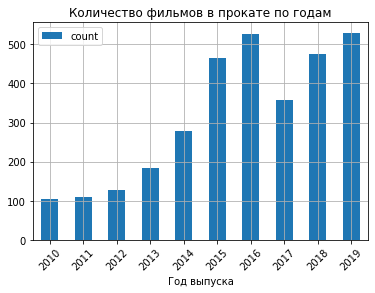

In [29]:
films_per_year.plot(title='Количество фильмов в прокате по годам',
                    kind='bar', y='count', rot=45, grid=True, xlabel='Год выпуска')

**Вывод:** Доля фильмов с указанной информацией о прокате составляет 42%. Из графика видно, что меньше всего фильмов выпущенно в 2010г (105 фильмов), далее наблюдается увеличение количества выпускаемых фильмов. Больше всего выпущено в 2019 (530) и в 2016 (526) годах.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:title={'center':'Сумма сборов по годам'}, xlabel='Год выпуска'>

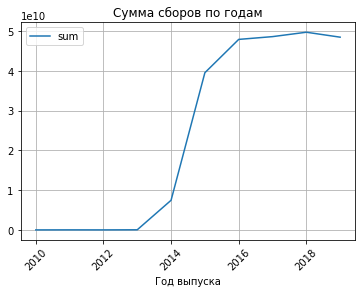

In [30]:
films_per_year.plot(title='Сумма сборов по годам', kind='line', y='sum',
                    rot=45, grid=True,xlabel='Год выпуска')


**Вывод:** Минимальное количество сборов было в 2010 (2428654), 2011 (14102765) годах. С 2013 года наблюдается рост сборов, что также связано с увеличением количества выпускаемых фильмов. Максимальная сумма сборов была в 2018 году (49668403134), несмотря на то, что в этом году фильмов выпущенно меньше чем в 2019г. 

- Посчитаеме среднюю и медианную сумму сборов для каждого года.

<AxesSubplot:title={'center':'Средняя и медианная сумма сборов по годам'}, xlabel='Год выпуска'>

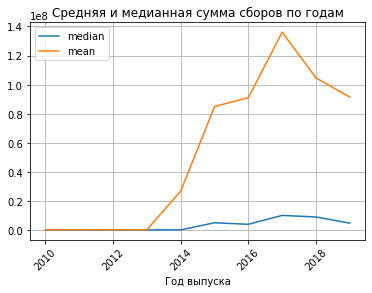

In [31]:
films_per_year.plot(title='Средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'],
                    rot=45, grid=True, xlabel='Год выпуска' )

**Вывод:** Наблюдается большой разброс данных, это видно из разницы между средней и медианой. Это означает, что в данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Что в целом для киноиндустрии можно считать нормой, так как анализировались и кассовые фильмы и авторское кино, и телевизионные проекты. В среднем, самый прибыльный год был 2017. Это видно и по медиане, и по средней.



- Определяем, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:title={'center':'Сумма сборов по годам с разбивкой по возрастным категориям'}, xlabel='Год выпуска'>

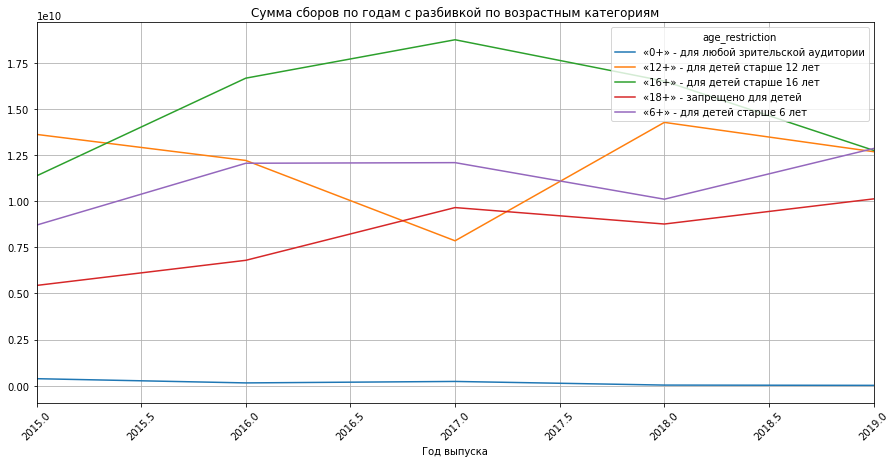

In [32]:
films[films['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(title='Сумма сборов по годам с разбивкой по возрастным категориям', kind='line', xlim=[2015, 2019],
          rot=45, grid=True, figsize=(15,7), xlabel='Год выпуска')


**Вывод:** По графику почти во все года лидирует по сборам кино 16+, в то время как катнгория 0+ стабильно показывает наименьшее количество сборов. 

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку



In [33]:
#постоим сводную таблицу отображающую фильмы с гос.поддержкой 
films_supported = films[films['refundable_support'].notna() | films['nonrefundable_support'].notna()]
# добавим несколько столбцов
# столбец показывающий сумму полной гос.поддержки
films_supported['full_support'] = (films_supported['nonrefundable_support'] + 
                                   films_supported['refundable_support'])
# столбец расчитывающий прибыльность
films_supported['profitability'] = films_supported['box_office'] / films_supported['full_support'] - 1
# столбцы показывающиие окупились фильмы или нет
films_supported['is_paid_off'] = films_supported['profitability'] > 0
films_supported['is_not_paid_off'] = ~films_supported['is_paid_off']
display(films_supported)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_corrected,year,main_director,main_genres,support_percentage,full_support,profitability,is_paid_off,is_not_paid_off
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик,NaN,0.0,NaN,False,True
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unkown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма,NaN,0.0,NaN,False,True
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN,0.0,NaN,False,True
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN,0.0,NaN,False,True
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика,NaN,0.0,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,Фил Грабски,NaN,NaN,0.0,NaN,False,True
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,5.4,"боевик,триллер",NaN,NaN,2019,Ник Пауэлл,боевик,NaN,0.0,NaN,False,True
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,Чарльз Е.Бастьен,NaN,NaN,0.0,NaN,False,True
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,А.Беляев,NaN,NaN,0.0,NaN,False,True


<AxesSubplot:title={'center':'Средняя оценка фильмов по жанрам'}, xlabel='Жанр'>

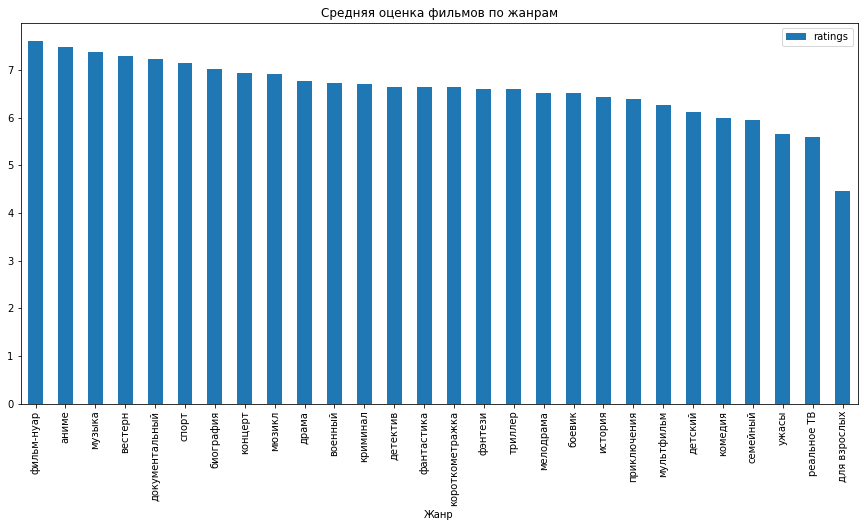

In [34]:
# выделим наиболее популярные жанры
films_supported[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='Средняя оценка фильмов по жанрам', kind='bar',
                                              figsize=(15,7), xlabel='Жанр')

<AxesSubplot:title={'center':'Количество фильмов, получивших господдержку (по жанрам)'}>

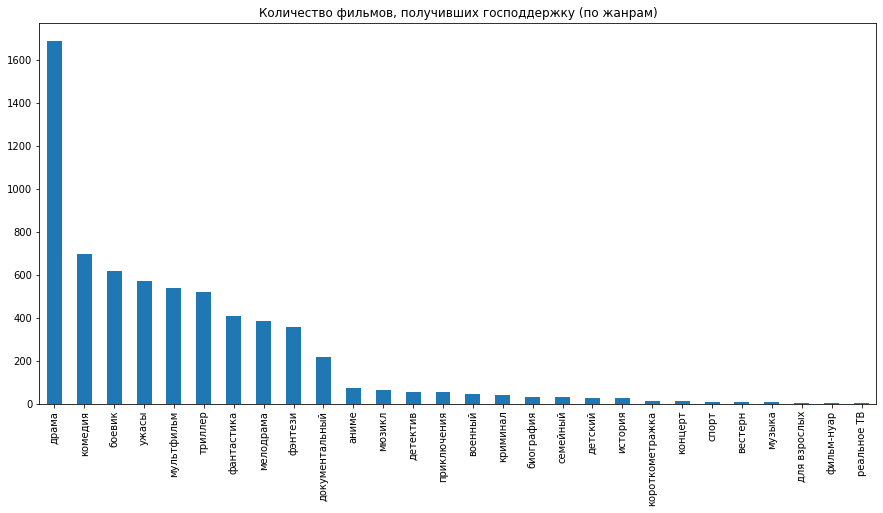

In [35]:
# посмотрим количество фильмов больше всего получивших гос.поддержку по жанрам
films_supported['main_genres'].value_counts().plot(title='Количество фильмов, получивших господдержку (по жанрам)',
                                                   figsize=(15,7), kind='bar')

<AxesSubplot:title={'center':'Количество окупившихся и не окупившихся фильмов'}, xlabel='Жанр'>

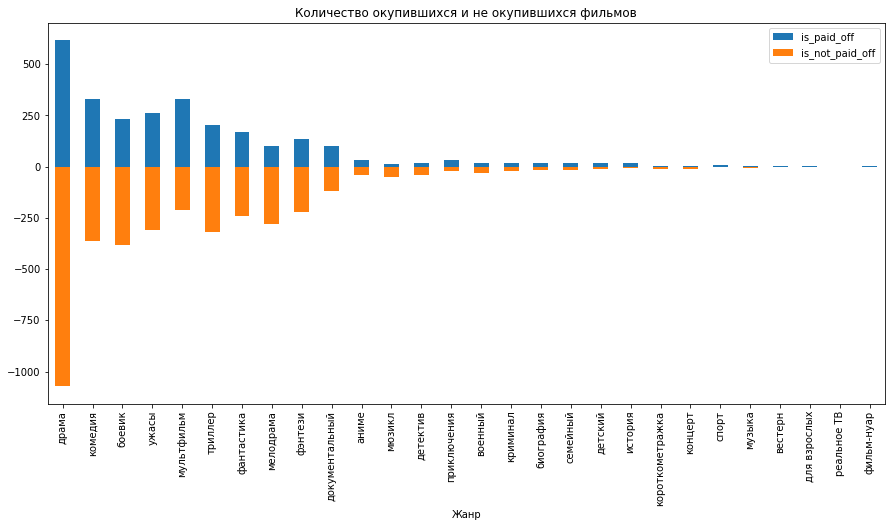

In [36]:
# проанализируем количесиво окупившихся или неокупившихся фильмов по жанрам
films_supported.groupby('main_genres') \
            .agg({'title': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='Количество окупившихся и не окупившихся фильмов',
                  kind='bar',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'],
                  figsize=(15,7),
                  xlabel='Жанр')

<AxesSubplot:title={'center':'Объём видов государственной поддержки'}, xlabel='Жанр'>

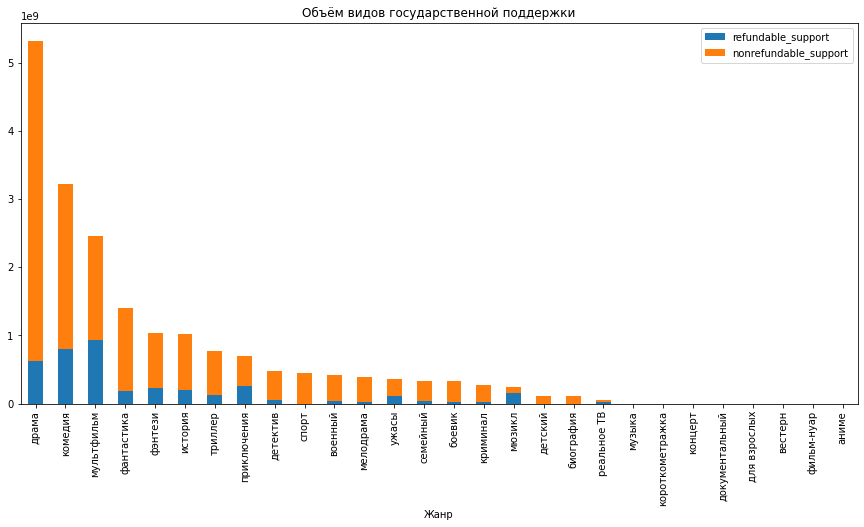

In [37]:
# посмотрим объем видов господдержки по жанрам
films_supported.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Объём видов государственной поддержки',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'],
                  figsize=(15,7),
                  xlabel='Жанр')

Корелляция от ratings 0.08885517959968678


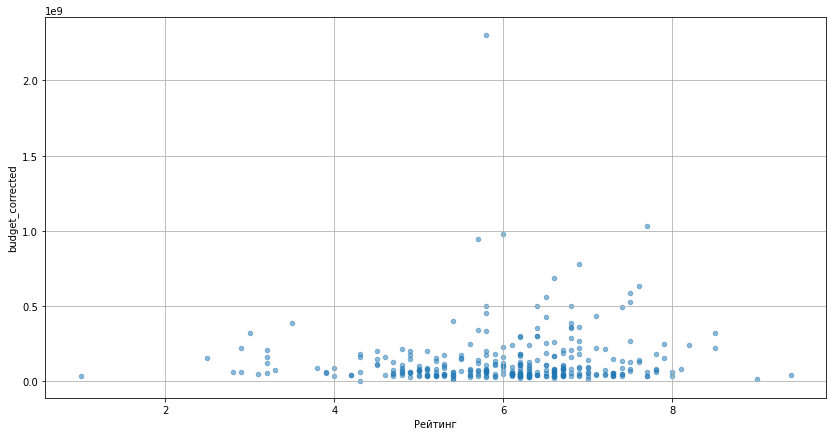

In [38]:
# напишем функцию для рассчета суммы поддержки от рейтинга
def correlation(column):  
    print('Корелляция от', column, films['budget_corrected'].corr(films[column]))
    films.plot(x=column, y='budget_corrected', kind='scatter', grid=True,
               figsize=(14,7), alpha=0.5, xlabel='Рейтинг');

correlation('ratings')

**Вывод:** <br>
Наиболее высокие рейтинги у фильмов в жанре нуар и аниме. Самые низкие рейтинги у фильмов для взрослых. Больше всего выделяется господдержки на драмы. В видах господдержки приобладают невозвратные средства, несморя на то, что довольно большое количество фильмов неокупается. Корреляции между рейтингом и финансовой поддержкой государства не обнаружено.

### Шаг 5. Общий вывод

В проекте исследованы данные, опубликованные на портале открытых данных Министерства культуры - информация о результатах проката и объемах господдержки фильмов с 2010 по 2019 года.

При подготовки данных выполнены следующие этапы: <br>
1)Создана таблица объединяющая в себе два датафрейма;<br>
2)Проведена оптимизация типов данных:<br>
-В столбце "puNumber" поменяли тип на int. Несмотря на то, что в столбце категориальные данные это нужно было сделать для объединения таблиц;<br>
-В столбце "ratings" исправленны некорректно записаные данные и поменян тип на float<br>
-В столбце "show_start_date" поменяли тип на datetime;<br>
3)При анализе пропусков было сделано следующее:<br>
-Пропущена значительная часть данный в refundable_support, nonrefundable_support, budget, financing_source. Так как данные говорят об объёме государственной поддержки, то пропуски скорее всего свидетельствуют об ее отсутствии. Заменили пропуски на 0 в этих столбцах;<br>
-Заполнили пропуски в столбце 'production_country', поискав дополнительную информацию, и уточнив, что пропущенные фильмы производятся в России;<br>
-В столбцах film_studio, director, producer заменим пропуски на unknown;<br>
-Пропуски в столбце rating оставим без изменений. Возможно пропуски появились из-за технической ошибки и заполнить их корректно не получится. Также оставили без изменений пропуски во всех остальных столбцах, так как корректно заполнить их непредставляется возможным.<br>
4)При посиске дублей обнаружили, что полностью повторяющихся строк нет. Есть дубли в названиях фильмов, это связано с выдачей разных прокатных удостоверений. Есть дубли в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Возможно сыграл человеческий фактор при заполнении какой-нибудь формы. Удалить эти дубликаты мы не можем, так как они связаны с другими данными.<br>
5)Большая часть таблицы это категориальные данные. Лишние пробелы в начале или конце строки является частой проблемой таких данных. Помимо столбца type, также были обнаружены и убраны пробелы в строке столбца 'puNumber'.<br>
6)Был ряд фильмов, которые получали господдержку, но в столбце показывающим объем госсредств стоял 0. Исправили такие строки бюджета на сумму видов господдержки.

В рамках проведенного исследования можно сделать следующие выводы:<br>
1)Доля участия государства в бюджете фильма составляет примерно 61%<br>
2)Доля фильмов с указанной информацией о прокате составляет 42%. Меньше всего фильмов выпущенно в 2010г (105 фильмов), далее наблюдается увеличение количества выпускаемых фильмов. Больше всего выпущено в 2019 (530) и в 2016 (526) годах;<br>
3)Минимальное количество сборов было в 2010 (2 428 654), 2011 (14 102 765) годах. С 2013 года наблюдается рост сборов, что также связано с увеличением количества выпускаемых фильмов. Максимальная сумма сборов была в 2018 году (49 668 403 134), несмотря на то, что в этом году фильмов выпущенно меньше чем в 2019г;<br>
4)Из разницы между показателями средней и медианой, видно, что в данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Что в целом для киноиндустрии можно считать нормой, так как анализировались и кассовые фильмы и авторское кино, и телевизионные проекты. В среднем, самый прибыльный год был 2017. Это видно и по медиане, и по средней;<br>
5)По сборам почти во все года лидирует кино 16+, в то время как категория 0+ стабильно показывает наименьшее количество сборов;<br>
6)Наиболее высокие рейтинги у фильмов в жанре нуар и аниме. Самые низкие рейтинги у фильмов для взрослых. Больше всего выделяется господдержки на драмы;<br>
7)В видах господдержки приобладают невозвратные средства, несморя на то, что довольно большое количество фильмов с выделенной поддержкой неокупается. Зависимости между рейтингом и финансовой поддержкой государства не обнаружено.<br>